In [1]:
import torch.nn as nn
import torch.nn.functional as F
import torch
from librosa.filters import mel as librosa_mel_fn
from torch.nn.utils import weight_norm
import numpy as np
from pathlib import Path
import yaml
import torch
import os
from librosa.core import load
from librosa.util import normalize
import random

In [2]:
class Audio2Mel(nn.Module):
    def __init__(
        self,
        n_fft=1024,
        hop_length=256,
        win_length=1024,
        sampling_rate=22050,
        n_mel_channels=80,
        mel_fmin=0.0,
        mel_fmax=None,
    ):
        super().__init__()
        ##############################################
        # FFT Parameters                              #
        ##############################################
        window = torch.hann_window(win_length).float()
        mel_basis = librosa_mel_fn(
            sampling_rate, n_fft, n_mel_channels, mel_fmin, mel_fmax
        )
        mel_basis = torch.from_numpy(mel_basis).float()
        self.register_buffer("mel_basis", mel_basis)
        self.register_buffer("window", window)
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.win_length = win_length
        self.sampling_rate = sampling_rate
        self.n_mel_channels = n_mel_channels

    def forward(self, audio):
        p = (self.n_fft - self.hop_length) // 2
        audio = F.pad(audio, (p, p), "reflect").squeeze(1)
        fft = torch.stft(
            audio,
            n_fft=self.n_fft,
            hop_length=self.hop_length,
            win_length=self.win_length,
            window=self.window,
            center=False,
        )
        real_part, imag_part = fft.unbind(-1)
        magnitude = torch.sqrt(real_part ** 2 + imag_part ** 2)
        mel_output = torch.matmul(self.mel_basis, magnitude)
        log_mel_spec = torch.log10(torch.clamp(mel_output, min=1e-5))
        return log_mel_spec

In [3]:
def weights_init(m):
    classname = m.__class__.__name__ #finds class name
    if 

SyntaxError: invalid syntax (2802065576.py, line 3)

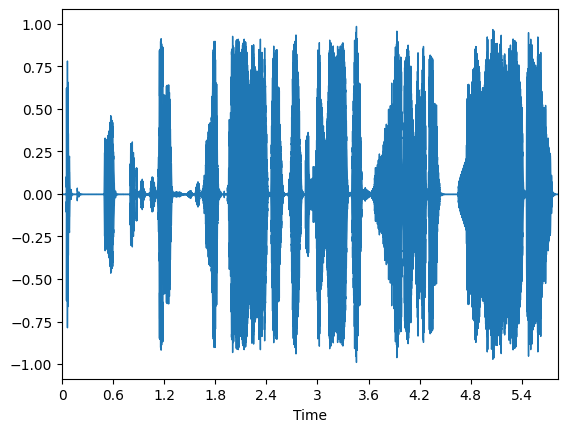

In [4]:
import librosa 
import librosa.display
f = "/home/nikhil/Desktop/voice_swapper/speakers_test_p1_p1_301.wav"
y, sr = librosa.load(f)
# trim silent edges
whale_song, _ = librosa.effects.trim(y)
librosa.display.waveplot(whale_song)

/home/nikhil/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


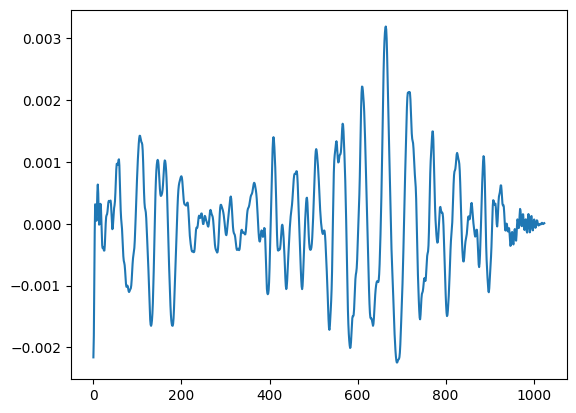

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n_fft = 2048
D = librosa.stft(whale_song[:n_fft], n_fft=n_fft, hop_length=n_fft+1)
plt.plot(D)

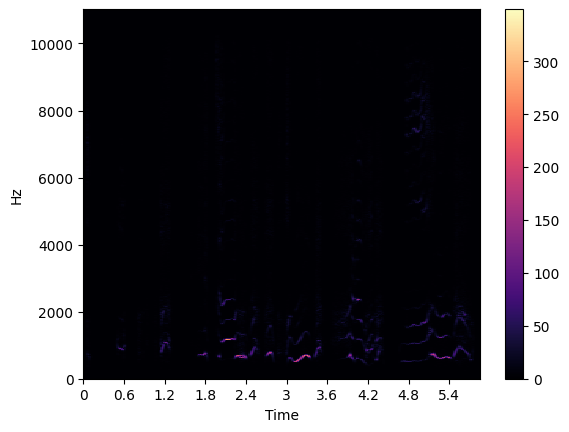

In [5]:

hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft,  hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

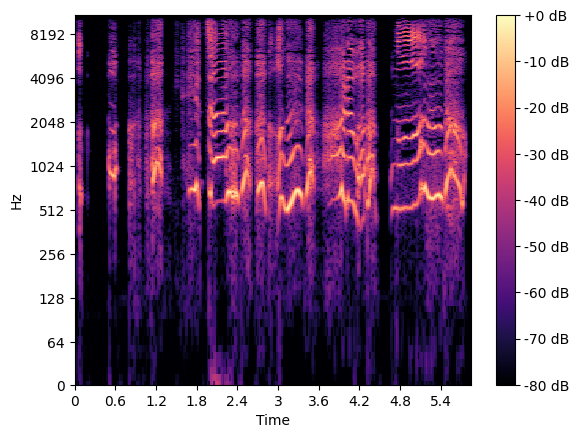

In [6]:

DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

NameError: name 'mel' is not defined

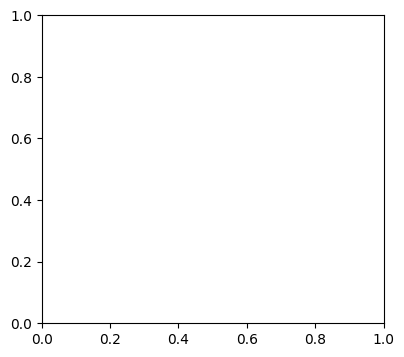

In [8]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
librosa.display.specshow(mel, sr=sr, hop_length=hop_length, x_axis='linear')
plt.ylabel('Mel filter')
plt.colorbar()
plt.title('1. Our filter bank for converting from Hz to mels.')

plt.subplot(1, 3, 2)
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length, x_axis='linear')
plt.ylabel('Mel filter')
plt.colorbar()
plt.title('2. Easier to see what is happening with only 10 mels.')

plt.subplot(1, 3, 3)
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i])
plt.legend(labels=[f'{i+1}' for i in idxs_to_plot])
plt.title('3. Plotting some triangular filters separately.')

plt.tight_layout()

/home/nikhil/anaconda3/lib/python3.9/site-packages/librosa/filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


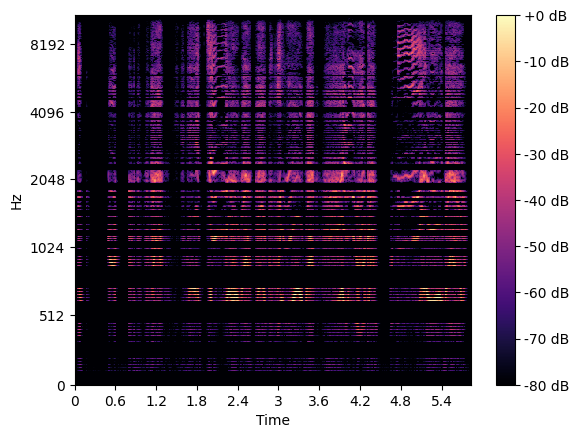

In [23]:
n_fft=1024
hop_length=256
win_length=1024
sampling_rate=22050
n_mel_channels=80
S = librosa.feature.melspectrogram(whale_song, sr=sampling_rate, n_fft=n_fft, hop_length=hop_length, n_mels=2048, win_length=win_length)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [24]:
audio  = librosa.feature.inverse.mel_to_audio(S,sr=22050, n_fft=n_fft, hop_length=hop_length, win_length=win_length)

/home/nikhil/anaconda3/lib/python3.9/site-packages/librosa/filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(


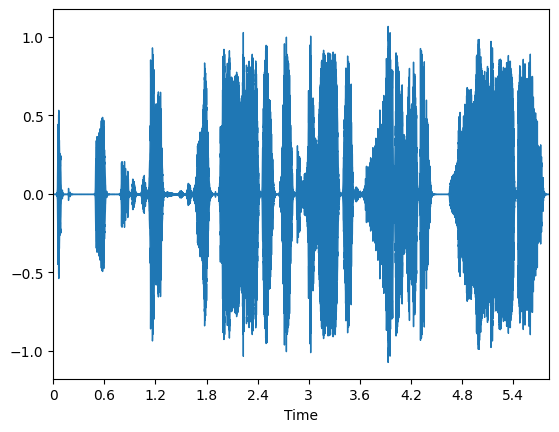

In [26]:
librosa.display.waveplot(audio)

In [27]:
from scipy.io.wavfile import write

In [28]:
write("test_loss.wav",sampling_rate,audio)

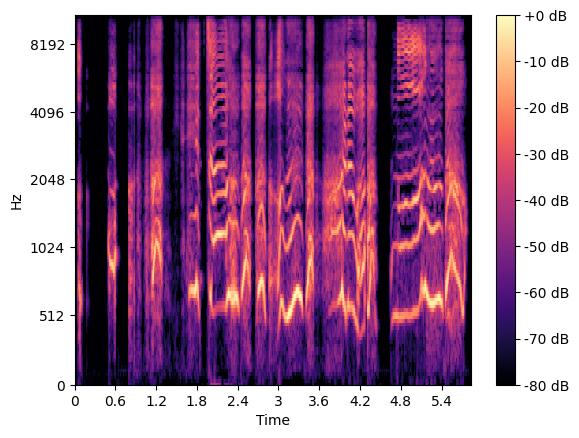

In [40]:

n_fft=1024
hop_length=256
win_length=1024
sampling_rate=22050
n_mels=128
S = librosa.feature.melspectrogram(whale_song, sr=sampling_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, win_length=win_length)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')


In [41]:
audio  = librosa.feature.inverse.mel_to_audio(S,sr=22050, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
write("test_loss2.wav",sampling_rate,audio)

In [43]:
S.shape

(128, 503)

In [42]:
S.size

64384

In [46]:
class Audio2Mel(nn.Module):
    def __init__(
        self,
        n_fft=1024,
        hop_length=256,
        win_length=1024,
        sampling_rate=22050,
        n_mels=128,
    ):
        super().__init__()
    def forward(self, audio):
        mel = librosa.feature.melspectrogram(audio,sr=sampling_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, win_length=win_length)
        return mel

In [47]:
c = Audio2Mel()

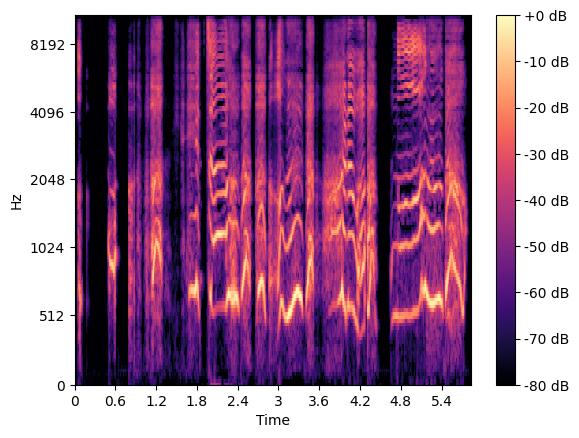

In [49]:
mel = c.forward(whale_song)
mel_DB = librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [51]:
mel.shape

(128, 503)

In [58]:
np.sum(S!=mel)

0

In [59]:
def mel_display(S):
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')

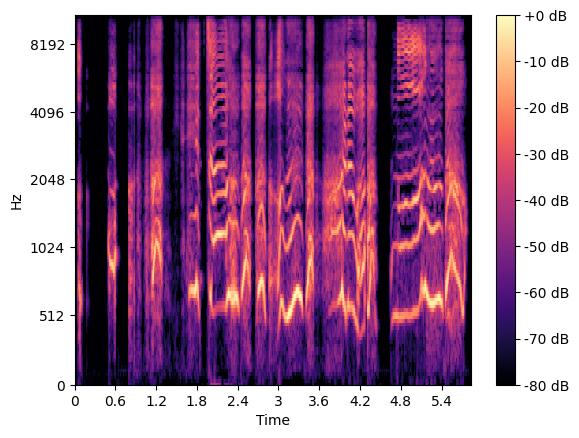

In [60]:
mel_display(mel)

In [6]:
class gated_resnet(nn.Module):
    """
    Gated Residual Block
    """
    def __init__(self, num_filters, kernel_size, padding, nonlinearity=nn.ReLU, dropout=0.2, dilation=1,batchNormObject=nn.BatchNorm2d):
        super(gated_resnet, self).__init__()
        self.gated = True
        num_hidden_filters =2 * num_filters if gated else num_filters
        self.conv_input = nn.Conv2d(num_filters, num_hidden_filters, kernel_size=kernel_size,stride=1,padding=padding,dilation=dilation )
        self.dropout = nn.Dropout2d(dropout)
        self.nonlinearity = nonlinearity()
        self.batch_norm1 = batchNormObject(num_hidden_filters)
        self.conv_out = nn.Conv2d(num_hidden_filters, num_hidden_filters, kernel_size=kernel_size,stride=1,padding=padding,dilation=dilation )
        self.batch_norm2 = batchNormObject(num_filters)

    def forward(self, og_x):
        x = self.conv_input(og_x)
        x = self.batch_norm1(x)
        x = self.nonlinearity(x)
        x = self.dropout(x)
        x = self.conv_out(x)
        if self.gated:
            a, b = torch.chunk(x, 2, dim=1)
            c3 = a * F.sigmoid(b)
        else:
            c3 = x
        out = og_x + c3
        out = self.batch_norm2(out)
        return out
    
class ResidualBlock(nn.Module):
    """
    Residual Block
    """
    def __init__(self, num_filters, kernel_size, padding, nonlinearity=nn.ReLU, dropout=0.2, dilation=1,batchNormObject=nn.BatchNorm2d):
        super(ResidualBlock, self).__init__()
        num_hidden_filters = num_filters
        self.conv1 = nn.Conv2d(num_filters, num_hidden_filters, kernel_size=kernel_size,stride=1,padding=padding,dilation=dilation )
        self.dropout = nn.Dropout2d(dropout)
        self.nonlinearity = nonlinearity(inplace=False)
        self.batch_norm1 = batchNormObject(num_hidden_filters)
        self.conv2 = nn.Conv2d(num_hidden_filters, num_hidden_filters, kernel_size=kernel_size,stride=1,padding=padding,dilation=dilation )
        self.batch_norm2 = batchNormObject(num_filters)

    def forward(self, og_x):
        x = og_x
        x = self.dropout(x)
        x = self.conv1(og_x)
        x = self.batch_norm1(x)
        x = self.nonlinearity(x)
        x = self.conv2(x)
        out = og_x + x
        out = self.batch_norm2(out)
        out = self.nonlinearity(out)
        return out
    
class ConvolutionalEncoder(nn.Module):
    """
    Convolutional Encoder providing skip connections
    """
    def __init__(self,n_features_input,num_hidden_features,kernel_size,padding,n_resblocks,dropout_min=0,dropout_max=0.2, blockObject=ResidualBlock,batchNormObject=nn.BatchNorm2d):
        """
        n_features_input (int): number of intput features
        num_hidden_features (list(int)): number of features for each stage
        kernel_size (int): convolution kernel size
        padding (int): convolution padding
        n_resblocks (int): number of residual blocks at each stage
        dropout (float): dropout probability
        blockObject (nn.Module): Residual block to use. Default is ResidualBlock
        batchNormObject (nn.Module): normalization layer. Default is nn.BatchNorm2d
        """
        super(ConvolutionalEncoder,self).__init__()
        self.n_features_input = n_features_input
        self.num_hidden_features = num_hidden_features
        self.stages = nn.ModuleList()
        dropout = iter([(1-t)*dropout_min + t*dropout_max   for t in np.linspace(0,1,(len(num_hidden_features)))])
        dropout = iter(dropout)
        # input convolution block
        block = [nn.Conv2d(n_features_input, num_hidden_features[0], kernel_size=kernel_size,stride=1, padding=padding)]
        for _ in range(n_resblocks):
            p = next(iter(dropout))
            block += [blockObject(num_hidden_features[0], kernel_size, padding, dropout=p,batchNormObject=batchNormObject)]
        self.stages.append(nn.Sequential(*block))
        # layers
        for features_in,features_out in [num_hidden_features[i:i+2] for i in range(0,len(num_hidden_features), 1)][:-1]:
            # downsampling
            block = [nn.MaxPool2d(2),nn.Conv2d(features_in, features_out, kernel_size=1,padding=0 ),batchNormObject(features_out),nn.ReLU()]
            #block = [nn.Conv2d(features_in, features_out, kernel_size=kernel_size,stride=2,padding=padding ),nn.BatchNorm2d(features_out),nn.ReLU()]
            # residual blocks
            p = next(iter(dropout))
            for _ in range(n_resblocks):
                block += [blockObject(features_out, kernel_size, padding, dropout=p,batchNormObject=batchNormObject)]
            self.stages.append(nn.Sequential(*block)) 
            
    def forward(self,x):
        skips = []
        for stage in self.stages:
            x = stage(x)
            skips.append(x)
        return x,skips
    def getInputShape(self):
        return (-1,self.n_features_input,-1,-1)
    def getOutputShape(self):
        return (-1,self.num_hidden_features[-1], -1,-1)
    
            
class ConvolutionalDecoder(nn.Module):
    """
    Convolutional Decoder taking skip connections
    """
    def __init__(self,n_features_output,num_hidden_features,kernel_size,padding,n_resblocks,dropout_min=0,dropout_max=0.2,blockObject=ResidualBlock,batchNormObject=nn.BatchNorm2d):
        """
        n_features_output (int): number of output features
        num_hidden_features (list(int)): number of features for each stage
        kernel_size (int): convolution kernel size
        padding (int): convolution padding
        n_resblocks (int): number of residual blocks at each stage
        dropout (float): dropout probability
        blockObject (nn.Module): Residual block to use. Default is ResidualBlock
        batchNormObject (nn.Module): normalization layer. Default is nn.BatchNorm2d
        """
        super(ConvolutionalDecoder,self).__init__()
        self.n_features_output = n_features_output
        self.num_hidden_features = num_hidden_features
        self.upConvolutions = nn.ModuleList()
        self.skipMergers = nn.ModuleList()
        self.residualBlocks = nn.ModuleList()
        dropout = iter([(1-t)*dropout_min + t*dropout_max   for t in np.linspace(0,1,(len(num_hidden_features)))][::-1])
        # input convolution block
        # layers
        for features_in,features_out in [num_hidden_features[i:i+2] for i in range(0,len(num_hidden_features), 1)][:-1]:
            # downsampling
            self.upConvolutions.append(nn.Sequential(nn.ConvTranspose2d(features_in, features_out, kernel_size=3, stride=2,padding=1,output_padding=1),batchNormObject(features_out),nn.ReLU()))
            self.skipMergers.append(nn.Conv2d(2*features_out, features_out, kernel_size=kernel_size,stride=1, padding=padding))
            # residual blocks
            block = []
            p = next(iter(dropout))
            for _ in range(n_resblocks):
                block += [blockObject(features_out, kernel_size, padding, dropout=p,batchNormObject=batchNormObject)]
            self.residualBlocks.append(nn.Sequential(*block))   
        # output convolution block
        block = [nn.Conv2d(num_hidden_features[-1],n_features_output, kernel_size=kernel_size,stride=1, padding=padding)]
        self.output_convolution = nn.Sequential(*block)

    def forward(self,x, skips):
        for up,merge,conv,skip in zip(self.upConvolutions,self.skipMergers, self.residualBlocks,skips):
            x = up(x)
            cat = torch.cat([x,skip],1)
            x = merge(cat)
            x = conv(x)
        return self.output_convolution(x)
    def getInputShape(self):
        return (-1,self.num_hidden_features[0],-1,-1)
    def getOutputShape(self):
        return (-1,self.n_features_output, -1,-1)
    
    
class DilatedConvolutions(nn.Module):
    """
    Sequential Dialted convolutions
    """
    def __init__(self, n_channels, n_convolutions, dropout):
        super(DilatedConvolutions, self).__init__()
        kernel_size = 3
        padding = 1
        self.dropout = nn.Dropout2d(dropout)
        self.non_linearity = nn.ReLU(inplace=True)
        self.strides = [2**(k+1) for k in range(n_convolutions)]
        convs = [nn.Conv2d(n_channels, n_channels, kernel_size=kernel_size,dilation=s, padding=s) for s in self.strides ]
        self.convs = nn.ModuleList()
        self.bns = nn.ModuleList()
        for c in convs:
            self.convs.append(c)
            self.bns.append(nn.BatchNorm2d(n_channels))
    def forward(self,x):
        skips = []
        for (c,bn,s) in zip(self.convs,self.bns,self.strides):
            x_in = x
            x = c(x)
            x = bn(x)
            x = self.non_linearity(x)
            x = self.dropout(x)
            x = x_in + x
            skips.append(x)
        return x,skips
    
class DilatedConvolutions2(nn.Module):
    """
    Sequential Dialted convolutions
    """
    def __init__(self, n_channels, n_convolutions,dropout,kernel_size,blockObject=ResidualBlock,batchNormObject=nn.BatchNorm2d):
        super(DilatedConvolutions2, self).__init__()
        self.dilatations = [2**(k+1) for k in range(n_convolutions)]
        self.blocks = nn.ModuleList([blockObject(n_channels, kernel_size, d, dropout=dropout, dilation=d,batchNormObject=batchNormObject) for d in self.dilatations ])
    def forward(self,x):
        skips = []
        for b in self.blocks:
            x = b(x)
            skips.append(x)
        return x, skips
    
class UNet(nn.Module):
    """
    U-Net model with dynamic number of layers, Residual Blocks, Dilated Convolutions, Dropout and Group Normalization
    """
    def __init__(self, in_channels, out_channels, num_hidden_features,n_resblocks,num_dilated_convs, dropout_min=0, dropout_max=0, gated=False, padding=1, kernel_size=3,group_norm=32):
        """
        initialize the model
        Args:
            in_channels (int): number of input channels (image=3)
            out_channels (int): number of output channels (n_classes)
            num_hidden_features (list(int)): number of hidden features for each layer (the number of layer is the lenght of this list)
            n_resblocks (int): number of residual blocks at each layer 
            num_dilated_convs (int): number of dilated convolutions at the last layer
            dropout (float): float in [0,1]: dropout probability
            gated (bool): use gated Convolutions, default is False
            padding (int): padding for the convolutions
            kernel_size (int): kernel size for the convolutions
            group_norm (bool): number of groups to use for Group Normalization, default is 32, if zero: use nn.BatchNorm2d
        """
        super(UNet, self).__init__()
        if group_norm > 0:
            for h in num_hidden_features:
                assert h%group_norm==0, "Number of features at each layer must be divisible by 'group_norm'"
        blockObject = gated_resnet if gated else ResidualBlock
        batchNormObject = lambda n_features : nn.GroupNorm(group_norm,n_features) if group_norm > 0 else nn.BatchNorm2d
        self.encoder = ConvolutionalEncoder(in_channels,num_hidden_features,kernel_size,padding,n_resblocks,dropout_min=dropout_min,dropout_max=dropout_max,blockObject=blockObject,batchNormObject=batchNormObject)
        if num_dilated_convs > 0:
            #self.dilatedConvs = DilatedConvolutions2(num_hidden_features[-1], num_dilated_convs,dropout_max,kernel_size,blockObject=blockObject,batchNormObject=batchNormObject)
            self.dilatedConvs = DilatedConvolutions(num_hidden_features[-1],num_dilated_convs,dropout_max) # <v11 uses dilatedConvs2
        else:
            self.dilatedConvs = None
        self.decoder = ConvolutionalDecoder(out_channels,num_hidden_features[::-1],kernel_size,padding,n_resblocks,dropout_min=dropout_min,dropout_max=dropout_max,blockObject=blockObject,batchNormObject=batchNormObject)
        
    def forward(self, x):
        x,skips = self.encoder(x)
        if self.dilatedConvs is not None:
            x,dilated_skips = self.dilatedConvs(x)
            for d in dilated_skips:
                x += d
            x += skips[-1]
        x = self.decoder(x,skips[:-1][::-1])
        return x

In [10]:
from torchsummary import summary
summary(UNet(1,1,[]))

TypeError: __init__() missing 2 required positional arguments: 'n_resblocks' and 'num_dilated_convs'